In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import urllib.request
import numpy as np
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [2]:
url = "https://raw.githubusercontent.com/ryurko/nflscrapR-data/master/play_by_play_data/regular_season/reg_pbp_2010.csv"

In [3]:
data = pd.read_csv(url)

C:\Users\kjyou\anaconda\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (166,167,168,169,174,175,178,179,182,183,188,189,190,191,194,195,203,204,205,218,219,220,231,232,233,238,240,241,249) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
pd.options.mode.chained_assignment = None

In [5]:
data = data.loc[
    (data['epa'].notnull()) &
    ((data['play_type'] == 'no_play') |
    (data['play_type'] == 'pass') |
    (data['play_type'] == 'run'))
]

In [6]:
data.drop(data[(data['replay_or_challenge'] == 0) & (data['desc'].str.contains('Timeout'))].index, inplace=True)

In [7]:
data = data.loc[data.desc.str.contains('kneels|spiked') == False]

In [8]:
data.reset_index(drop=True, inplace=True)

In [9]:
data.insert(69, 'home_off_success', 0)

In [10]:
data.loc[data['epa'] > 0, 'home_off_success'] = 1

In [11]:
data.insert(70, 'home_off_epa', 0)

In [12]:
data['home_off_epa'] = data['epa']

In [13]:
data.insert(71, 'away_off_success', 0)

In [14]:
data.loc[(data.play_type!='no_play') & (data.posteam==data.home_team)].groupby(['posteam'])[['home_off_epa', 'home_off_success']].mean()

,home_off_epa,home_off_success
posteam,,
ARI,-0.182143,0.359375
ATL,0.114768,0.419962
BAL,0.050983,0.394628
BUF,-0.156256,0.384120
CAR,-0.325385,0.289474
CHI,-0.061584,0.391499
CIN,-0.020930,0.427146
CLE,-0.107699,0.403727
DAL,0.028205,0.430189


In [15]:
data.loc[data['epa'] > 0, 'away_off_success'] = 1

In [16]:
data.insert(72, 'away_off_epa', 0)

In [17]:
data['away_off_epa'] = data['epa']

In [18]:
data.loc[(data.play_type!='no_play') & (data.posteam==data.away_team)].groupby(['posteam'])[['away_off_epa', 'away_off_success']].mean()

,away_off_epa,away_off_success
posteam,,
ARI,-0.240502,0.364606
ATL,0.022988,0.392265
BAL,-0.062846,0.365949
BUF,-0.125261,0.395789
CAR,-0.200215,0.363436
CHI,-0.154899,0.377155
CIN,-0.131492,0.432381
CLE,-0.106858,0.364078
DAL,0.001590,0.427105


In [19]:
data.insert(73, 'home_def_success', 0)

In [20]:
data.loc[data['epa'] > 0, 'home_def_success'] = 1

In [21]:
data.insert(74, 'home_def_epa', 0)

In [22]:
data['home_def_epa'] = data['epa']

In [23]:
data.loc[(data.play_type!='no_play') & (data.defteam==data.home_team)].groupby(['defteam'])[['home_def_epa', 'home_def_success']].mean()

,home_def_epa,home_def_success
defteam,,
ARI,-0.094989,0.392120
ATL,0.013161,0.429806
BAL,-0.040645,0.421589
BUF,0.013003,0.446296
CAR,-0.117980,0.380117
CHI,-0.044488,0.437376
CIN,0.000251,0.402174
CLE,0.054851,0.401980
DAL,0.104127,0.429185


In [24]:
data.insert(75, 'away_def_success', 0)

In [25]:
data.loc[data['epa'] > 0, 'away_def_success'] = 1

In [26]:
data.insert(76, 'away_def_epa', 0)

In [27]:
data['away_def_epa'] = data['epa']

In [28]:
data.loc[(data.play_type!='no_play') & (data.defteam==data.away_team)].groupby(['defteam'])[['away_def_epa', 'away_def_success']].mean()

,away_def_epa,away_def_success
defteam,,
ARI,0.055057,0.392453
ATL,-0.022347,0.412262
BAL,-0.080133,0.356275
BUF,0.064833,0.466535
CAR,0.012683,0.421965
CHI,-0.216634,0.370763
CIN,-0.021576,0.396186
CLE,-0.022403,0.421359
DAL,-0.073733,0.390947


In [29]:
data.insert(77, 'success', 0)

In [30]:
data.loc[data['epa'] > 0, 'success'] = 1

In [31]:
def getImage(path): 
    return OffsetImage(plt.imread(path), zoom=1)

In [32]:
logos = os.listdir(os.getcwd() + '\\logos\\')

logo_paths = []

for i in logos:
    logo_paths.append(os.getcwd() + '\\logos\\' + str(i))

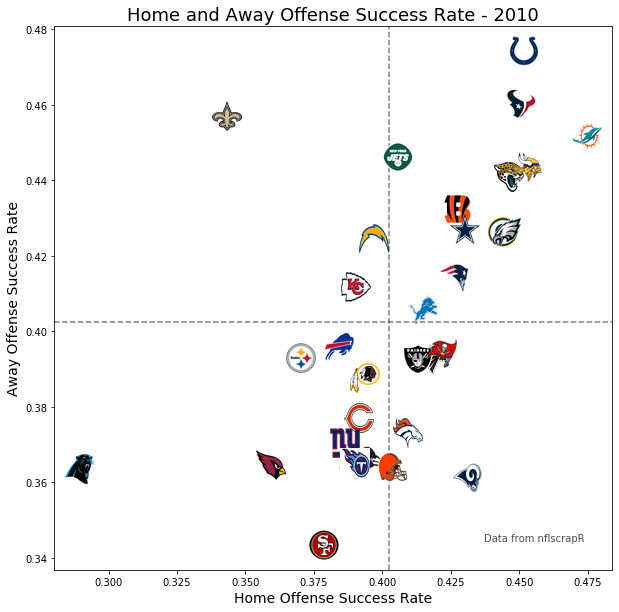

In [33]:
#Make x and y variables for success rate data
x = data.loc[(data.play_type!='no_play') & (data.posteam==data.home_team)].groupby(by='posteam')[['home_off_success']].mean().home_off_success.values
y = data.loc[(data.play_type!='no_play') & (data.posteam==data.away_team)].groupby(by='posteam')[['away_off_success']].mean().away_off_success.values

#Create a figure with size 10x10
fig, ax = plt.subplots(figsize=(10,10))

#Add Lines For Mean Results
ax.axvline(x=data.home_off_success.mean(), linestyle='--', alpha=.5, color='black')
ax.axhline(y=data.away_off_success.mean(), linestyle='--', alpha=.5, color='black')

#Make a scatter plot with success rate data
ax.scatter(x, y, s=.001)

#Adding logos to the chart
for x0, y0, path in zip(x, y, logo_paths):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False, fontsize=4)
    ax.add_artist(ab)

    #Adding labels and text
ax.set_xlabel('Home Offense Success Rate', fontsize=14)
ax.set_ylabel('Away Offense Success Rate', fontsize=14)
ax.set_title('Home and Away Offense Success Rate - 2010', fontsize=18)
ax.text(.95, .05, 'Data from nflscrapR', fontsize=10, alpha=.7, horizontalalignment='right',  verticalalignment='bottom', transform=ax.transAxes)

#Save the figure as a png
plt.savefig('img/2010-offense-home-away-success.png', dpi=400)

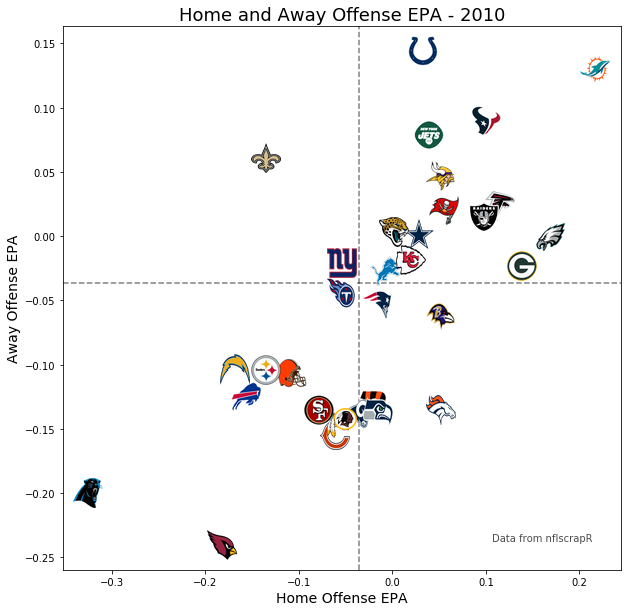

In [34]:
#Make x and y variables for success rate data
x = data.loc[(data.play_type!='no_play') & (data.posteam==data.home_team)].groupby(by='posteam')[['epa']].mean().epa.values
y = data.loc[(data.play_type!='no_play') & (data.posteam==data.away_team)].groupby(by='posteam')[['epa']].mean().epa.values

#Create a figure with size 10x10
fig, ax = plt.subplots(figsize=(10,10))

#Add Lines For Mean Results
ax.axvline(x=data.home_off_epa.mean(), linestyle='--', alpha=.5, color='black')
ax.axhline(y=data.away_off_epa.mean(), linestyle='--', alpha=.5, color='black')

#Make a scatter plot with success rate data
ax.scatter(x, y, s=.001)

#Adding logos to the chart
for x0, y0, path in zip(x, y, logo_paths):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False, fontsize=4)
    ax.add_artist(ab)

    #Adding labels and text
ax.set_xlabel('Home Offense EPA', fontsize=14)
ax.set_ylabel('Away Offense EPA', fontsize=14)
ax.set_title('Home and Away Offense EPA - 2010', fontsize=18)
ax.text(.95, .05, 'Data from nflscrapR', fontsize=10, alpha=.7, horizontalalignment='right',  verticalalignment='bottom', transform=ax.transAxes)

#Save the figure as a png
plt.savefig('img/2010-offense-home-away-epa.png', dpi=400)

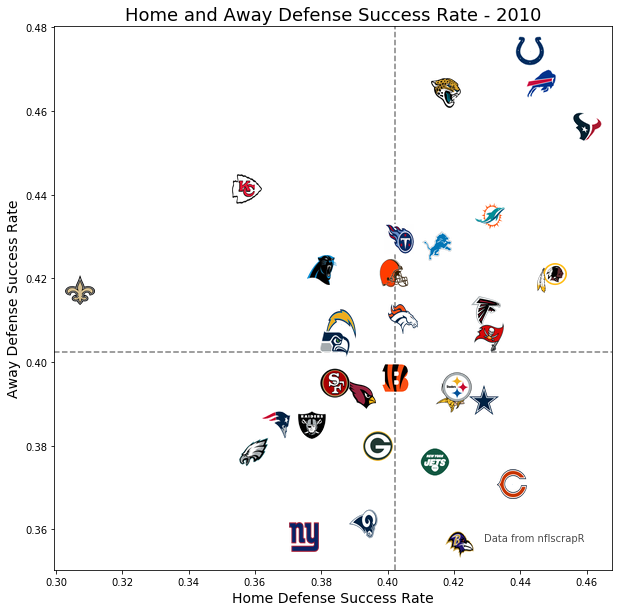

In [35]:
#Make x and y variables for success rate data
x = data.loc[(data.play_type!='no_play') & (data.defteam==data.home_team)].groupby(by='defteam')[['success']].mean().success.values
y = data.loc[(data.play_type!='no_play') & (data.defteam==data.away_team)].groupby(by='defteam')[['success']].mean().success.values

#Create a figure with size 10x10
fig, ax = plt.subplots(figsize=(10,10))

#Add Lines For Mean Results
ax.axvline(x=data.home_def_success.mean(), linestyle='--', alpha=.5, color='black')
ax.axhline(y=data.away_def_success.mean(), linestyle='--', alpha=.5, color='black')

#Make a scatter plot with success rate data
ax.scatter(x, y, s=.001)

#Adding logos to the chart
for x0, y0, path in zip(x, y, logo_paths):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False, fontsize=4)
    ax.add_artist(ab)

    #Adding labels and text
ax.set_xlabel('Home Defense Success Rate', fontsize=14)
ax.set_ylabel('Away Defense Success Rate', fontsize=14)
ax.set_title('Home and Away Defense Success Rate - 2010', fontsize=18)
ax.text(.95, .05, 'Data from nflscrapR', fontsize=10, alpha=.7, horizontalalignment='right',  verticalalignment='bottom', transform=ax.transAxes)

#Save the figure as a png
plt.savefig('img/2010-defense-home-away-success.png', dpi=400)

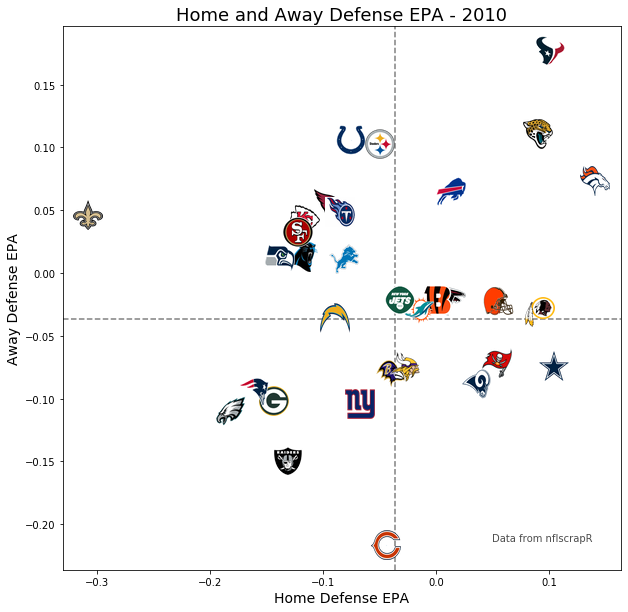

In [36]:
#Make x and y variables for success rate data
x = data.loc[(data.play_type!='no_play') & (data.defteam==data.home_team)].groupby(by='defteam')[['home_def_epa']].mean().home_def_epa.values
y = data.loc[(data.play_type!='no_play') & (data.defteam==data.away_team)].groupby(by='defteam')[['away_def_epa']].mean().away_def_epa.values

#Create a figure with size 10x10
fig, ax = plt.subplots(figsize=(10,10))

#Add Lines For Mean Results
ax.axvline(x=data.home_def_epa.mean(), linestyle='--', alpha=.5, color='black')
ax.axhline(y=data.away_def_epa.mean(), linestyle='--', alpha=.5, color='black')

#Make a scatter plot with success rate data
ax.scatter(x, y, s=.001)

#Adding logos to the chart
for x0, y0, path in zip(x, y, logo_paths):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False, fontsize=4)
    ax.add_artist(ab)

    #Adding labels and text
ax.set_xlabel('Home Defense EPA', fontsize=14)
ax.set_ylabel('Away Defense EPA', fontsize=14)
ax.set_title('Home and Away Defense EPA - 2010', fontsize=18)
ax.text(.95, .05, 'Data from nflscrapR', fontsize=10, alpha=.7, horizontalalignment='right',  verticalalignment='bottom', transform=ax.transAxes)

#Save the figure as a png
plt.savefig('img/2010-defense-home-away-epa.png', dpi=400)